#Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import dateutil as parser

#Mountkan Gdrive sebagai drive untuk database

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Memasukan Datanya daftar kejadian bencana bengkulu(banjir)

In [3]:
data_banjir = pd.read_excel('/content/drive/MyDrive/DATA SET/daftar kejadian bencana bengkulu.xlsx')

In [4]:
data_banjir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   tanggal_awal                         21 non-null     datetime64[ns]
 1   tanggal akhir                        16 non-null     datetime64[ns]
 2   bulan                                21 non-null     object        
 3   tahun                                21 non-null     int64         
 4   pukul_awal                           21 non-null     object        
 5   pukul_akhir                          16 non-null     object        
 6   desa/kelurahan                       21 non-null     object        
 7   kecamatan                            21 non-null     object        
 8   kabupaten/kota bengkulu              21 non-null     object        
 9   jumlah kejadian                      21 non-null     int64         
 10  luas_daerah_terd

In [5]:
data_banjir

,tanggal_awal,tanggal akhir,bulan,tahun,pukul_awal,pukul_akhir,desa/kelurahan,kecamatan,kabupaten/kota bengkulu,jumlah kejadian,...,kerusakan_jembatan,kerusakan_jalan,kerusakan_sawah,kerusakan_kebun,kerusakan_kolam,kerusakan_irigasi,kerusakan_taksirankerugian(Rp.Juta),keterangan,penanganan,Curah_hujan
0,2023-01-22,2023-01-23,Januari,2023,17:00:00,23:00:00,Kelurahan Bentiring,Muara Bangkahulu,KOTA BENGKULU,1,...,0,500,0,0,0,500,50,"EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...","EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...",8.0
1,2023-01-22,2023-01-23,Januari,2023,17:00:00,23:00:00,Kelurahan Bentiring Permai,Muara Bangkahulu,KOTA BENGKULU,1,...,0,200,0,0,0,200,50,"EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...","EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...",8.0
2,2023-01-22,2023-01-23,Januari,2023,17:00:00,23:00:00,Kelurahan Rawa Makmur,Muara Bangkahulu,KOTA BENGKULU,1,...,0,300,0,0,0,300,50,"EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...","EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...",8.0
3,2023-01-22,2023-01-23,Januari,2023,17:00:00,23:00:00,Kelurahan Rawa Makmur Permai,Muara Bangkahulu,KOTA BENGKULU,1,...,0,50,0,0,0,50,0,"EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...","EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...",8.0
4,2023-01-22,2023-01-23,Januari,2023,17:00:00,23:00:00,Kelurahan Tanjung Jaya,Sungai Serut,KOTA BENGKULU,1,...,0,100,10,0,0,100,50,"EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...","EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...",8.0
5,2023-01-22,2023-01-23,Januari,2023,17:00:00,23:00:00,Kelurahan Tanjung Agung,Sungai Serut,KOTA BENGKULU,1,...,0,100,10,0,0,100,50,"EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...","EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...",8.0
6,2023-01-22,2023-01-23,Januari,2023,17:00:00,23:00:00,Kelurahan Sukamerindu,Sungai Serut,KOTA BENGKULU,1,...,0,100,0,0,0,100,50,"EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...","EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...",8.0
7,2023-01-22,2023-01-23,Januari,2023,17:00:00,23:00:00,Kelurahan Pasar Bengkulu,Sungai Serut,KOTA BENGKULU,1,...,0,20,0,0,0,20,50,"EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...","EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...",8.0
8,2023-01-22,2023-01-23,Januari,2023,17:00:00,23:00:00,Kelurahan Surabaya,Sungai Serut,KOTA BENGKULU,1,...,0,20,0,0,0,20,50,"EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...","EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...",8.0
9,2023-01-22,2023-01-23,Januari,2023,17:00:00,23:00:00,Kelurahan Kampung Klawi,Sungai Serut,KOTA BENGKULU,1,...,0,20,0,0,0,20,50,"EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...","EVAKUASI MASYARAKAT TERDAMPAK BANJIR, MENDIRIK...",8.0


In [6]:
data_banjir.describe()

,tanggal_awal,tanggal akhir,tahun,jumlah kejadian,korban_meninggal(jiwa),korban_hilang(jiwa),korban_luka(jiwa),korban_mengungsi,korban_terdampak,kerusakan_rumah(RB),...,kerusakan_perkantoran,kerusakan_bangunanlain,kerusakan_jembatan,kerusakan_jalan,kerusakan_sawah,kerusakan_kebun,kerusakan_kolam,kerusakan_irigasi,kerusakan_taksirankerugian(Rp.Juta),Curah_hujan
count,21,16,21.0,21.0,21.000000,21.0,21.0,21.000000,21.000000,21.0,...,21.0,21.000000,21.0,21.000000,21.000000,21.0,21.0,21.000000,21.000000,21.000000
mean,2023-03-18 04:34:17.142857216,2023-03-06 04:30:00,2023.0,1.0,0.095238,0.0,0.0,45.523810,107.000000,0.0,...,0.0,2.857143,0.0,72.380952,0.952381,0.0,0.0,71.904762,30.476190,9.666667
min,2023-01-22 00:00:00,2023-01-23 00:00:00,2023.0,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,2023-01-22 00:00:00,2023-01-23 00:00:00,2023.0,1.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,10.000000,8.000000
50%,2023-01-22 00:00:00,2023-01-23 00:00:00,2023.0,1.0,0.000000,0.0,0.0,10.000000,40.000000,0.0,...,0.0,0.000000,0.0,20.000000,0.000000,0.0,0.0,20.000000,50.000000,8.000000
75%,2023-02-07 00:00:00,2023-01-23 00:00:00,2023.0,1.0,0.000000,0.0,0.0,50.000000,150.000000,0.0,...,0.0,0.000000,0.0,100.000000,0.000000,0.0,0.0,100.000000,50.000000,8.000000
max,2023-12-02 00:00:00,2023-09-05 00:00:00,2023.0,1.0,2.000000,0.0,0.0,220.000000,576.000000,0.0,...,0.0,20.000000,0.0,500.000000,10.000000,0.0,0.0,500.000000,50.000000,32.200000
std,NaN,NaN,0.0,0.0,0.436436,0.0,0.0,68.357603,154.999032,0.0,...,0.0,6.627863,0.0,124.253964,3.007926,0.0,0.0,124.523855,23.340135,7.009731


In [7]:
# Mengecek missing values
missing_values = data_banjir.isnull().sum()
missing_values[missing_values > 0]

tanggal akhir             5
pukul_akhir               5
luas_daerah_terdampak    12
keterangan                3
dtype: int64

In [8]:
data_banjir_clean = data_banjir.dropna()

In [9]:
data_banjir_clean = data_banjir.dropna(axis=1)

In [10]:
# Mengisi nilai NaN dengan nilai tetap (misalnya 0)
data_banjir.fillna(0, inplace=True)

In [11]:
# Mengecek  lagi missing values
missing_values = data_banjir.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [12]:
data_banjir['tanggal akhir']

0     2023-01-23 00:00:00
1     2023-01-23 00:00:00
2     2023-01-23 00:00:00
3     2023-01-23 00:00:00
4     2023-01-23 00:00:00
5     2023-01-23 00:00:00
6     2023-01-23 00:00:00
7     2023-01-23 00:00:00
8     2023-01-23 00:00:00
9     2023-01-23 00:00:00
10    2023-01-23 00:00:00
11    2023-01-23 00:00:00
12    2023-01-23 00:00:00
13                      0
14                      0
15                      0
16                      0
17                      0
18    2023-09-05 00:00:00
19    2023-09-05 00:00:00
20    2023-09-05 00:00:00
Name: tanggal akhir, dtype: object

Informasi Lokasi Terdampak Banjir:
desa/kelurahan
Kelurahan Bentiring              2
Kelurahan Bentiring Permai       1
Kelurahan Dusun Besar            1
Kelurahan Sukaramu               1
Kelurahan Padang Harapan         1
Kelurahan Kandang Mas            1
Jl. Pariwisata Pantai Panjang    1
Kelurahan Cempaka Permai         1
Kelurahan Sawah Lebar Baru       1
Kelurahan Sawah Lebar            1
Kelurahan Semarang               1
Kelurahan Kampung Klawi          1
Kelurahan Surabaya               1
Kelurahan Pasar Bengkulu         1
Kelurahan Sukamerindu            1
Kelurahan Tanjung Agung          1
Kelurahan Tanjung Jaya           1
Kelurahan Rawa Makmur Permai     1
Kelurahan Rawa Makmur            1
Kelurahan Nusa Indah             1
Name: count, dtype: int64


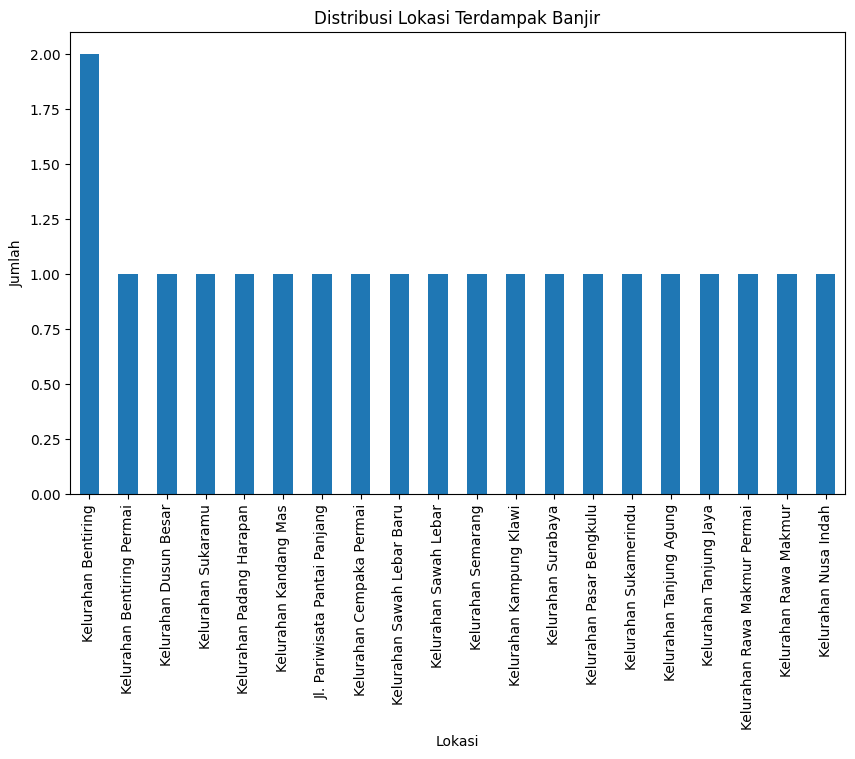

In [13]:
#Analisis berdasarkan lokasi desa/kelurahan yang terdampak banjir
print("Informasi Lokasi Terdampak Banjir:")
print(data_banjir['desa/kelurahan'].value_counts())

# 2. Visualisasi distribusi lokasi terdampak banjir
plt.figure(figsize=(10, 6))
data_banjir['desa/kelurahan'].value_counts().plot(kind='bar')
plt.title("Distribusi Lokasi Terdampak Banjir")
plt.xlabel("Lokasi")
plt.ylabel("Jumlah")
plt.xticks(rotation=90)
plt.show()

Total korban terdampak banjir: 2247

Jumlah korban per lokasi:
desa/kelurahan
Kelurahan Sukamerindu            576
Kelurahan Sawah Lebar Baru       400
Kelurahan Bentiring              301
Kelurahan Bentiring Permai       231
Kelurahan Tanjung Agung          155
Kelurahan Rawa Makmur            150
Kelurahan Tanjung Jaya           150
Kelurahan Surabaya                84
Kelurahan Pasar Bengkulu          67
Kelurahan Sawah Lebar             55
Kelurahan Semarang                40
Kelurahan Kampung Klawi           19
Kelurahan Rawa Makmur Permai      15
Kelurahan Padang Harapan           1
Kelurahan Kandang Mas              1
Kelurahan Sukaramu                 1
Kelurahan Cempaka Permai           1
Kelurahan Nusa Indah               0
Kelurahan Dusun Besar              0
Jl. Pariwisata Pantai Panjang      0
Name: korban_terdampak, dtype: int64

Jumlah korban mengungsi:
korban_mengungsi
0        5
10      74
15     122
30      84
50     300
90     155
105    400
151    231
200    300
220

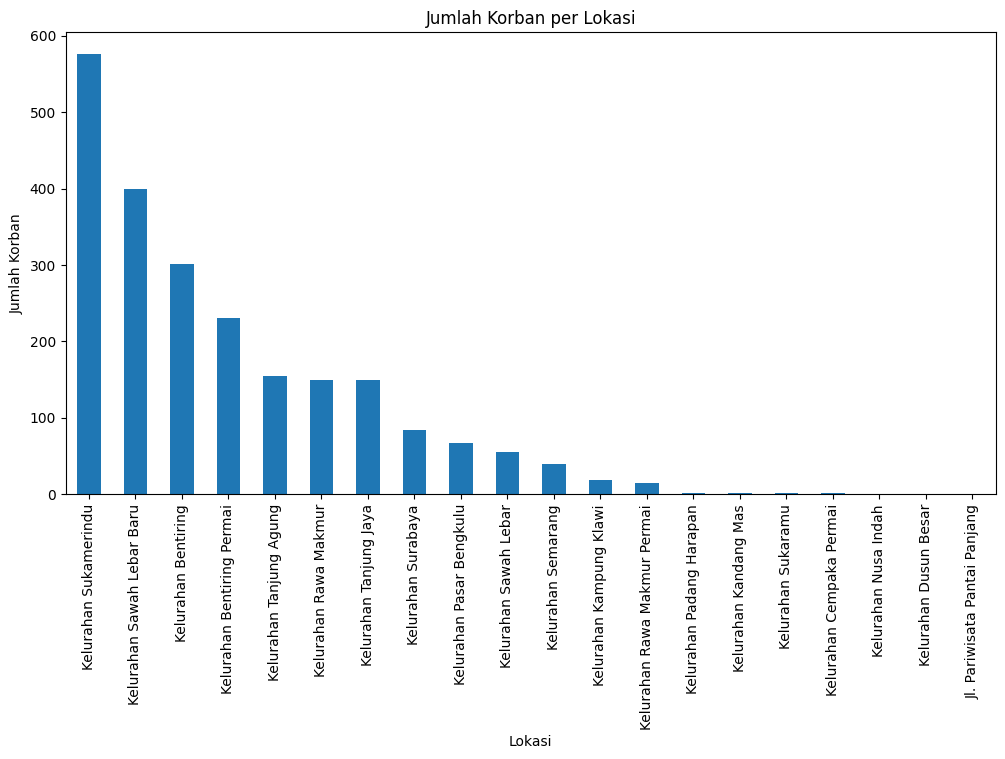

In [14]:
# Analisis data berdasarkan korban terdampak
total_korban = data_banjir['korban_terdampak'].sum()
print(f"Total korban terdampak banjir: {total_korban}")

korban_per_lokasi = data_banjir.groupby('desa/kelurahan')['korban_terdampak'].sum().sort_values(ascending=False)
print("\nJumlah korban per lokasi:")
print(korban_per_lokasi)


korban_mengungsi = data_banjir.groupby('korban_mengungsi')['korban_terdampak'].sum()
print("\nJumlah korban mengungsi:")
print(korban_mengungsi)

# Visualisasi data
plt.figure(figsize=(12, 6))
korban_per_lokasi.plot(kind='bar')
plt.title('Jumlah Korban per Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Korban')
plt.show()

<ipython-input-15-2f2b50556f45>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_banjir, x='bulan', palette='viridis')


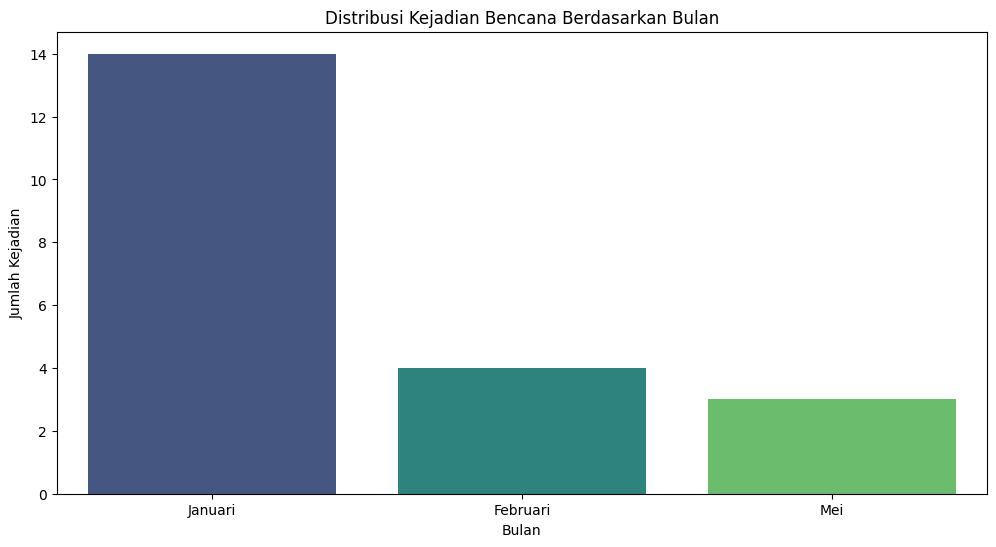

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_banjir, x='bulan', palette='viridis')
plt.title('Distribusi Kejadian Bencana Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kejadian')
plt.show()

<ipython-input-16-87aa7b2acc81>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_banjir, y='desa/kelurahan', palette='viridis', order=data_banjir['desa/kelurahan'].value_counts().index)


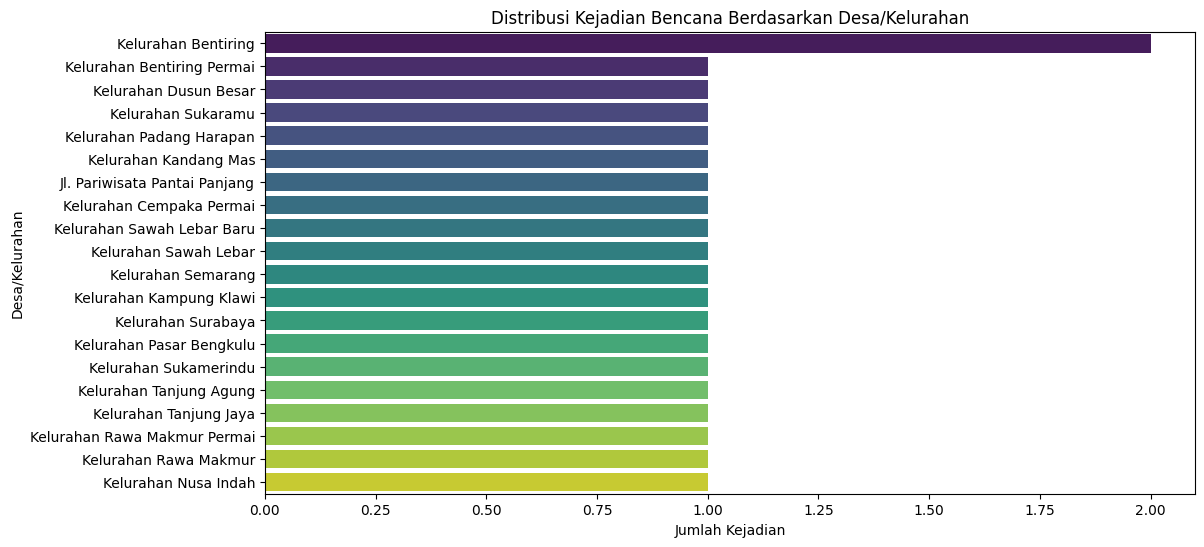

In [16]:
# Distribusi kejadian berdasarkan desa/kelurahan
plt.figure(figsize=(12, 6))
sns.countplot(data=data_banjir, y='desa/kelurahan', palette='viridis', order=data_banjir['desa/kelurahan'].value_counts().index)
plt.title('Distribusi Kejadian Bencana Berdasarkan Desa/Kelurahan')
plt.xlabel('Jumlah Kejadian')
plt.ylabel('Desa/Kelurahan')
plt.show()

<ipython-input-17-13aebf0b32b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_banjir, y='kecamatan', palette='viridis', order=data_banjir['kecamatan'].value_counts().index)


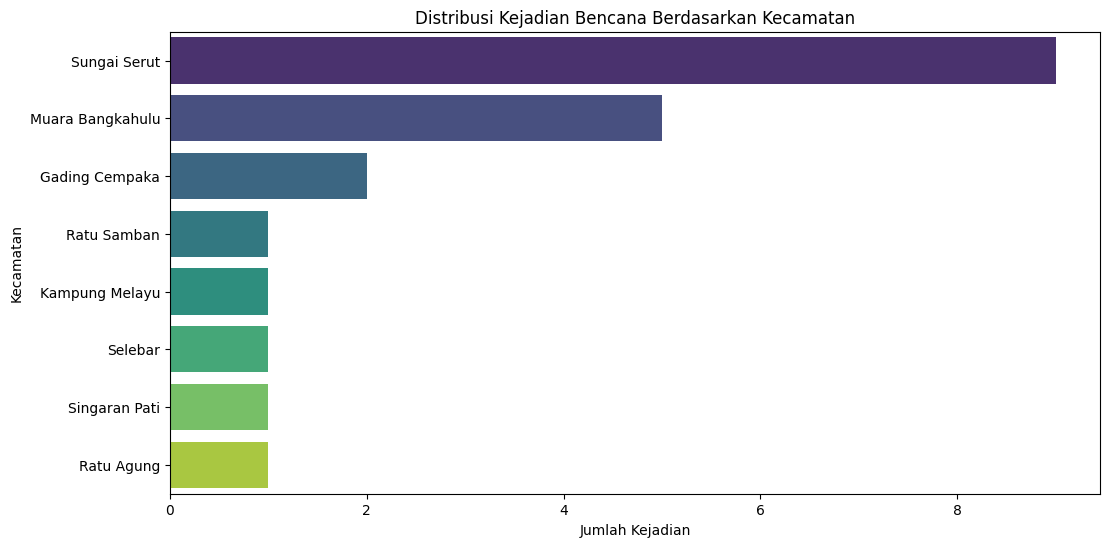

In [17]:
# Distribusi kejadian berdasarkan kecamatan
plt.figure(figsize=(12, 6))
sns.countplot(data=data_banjir, y='kecamatan', palette='viridis', order=data_banjir['kecamatan'].value_counts().index)
plt.title('Distribusi Kejadian Bencana Berdasarkan Kecamatan')
plt.xlabel('Jumlah Kejadian')
plt.ylabel('Kecamatan')
plt.show()

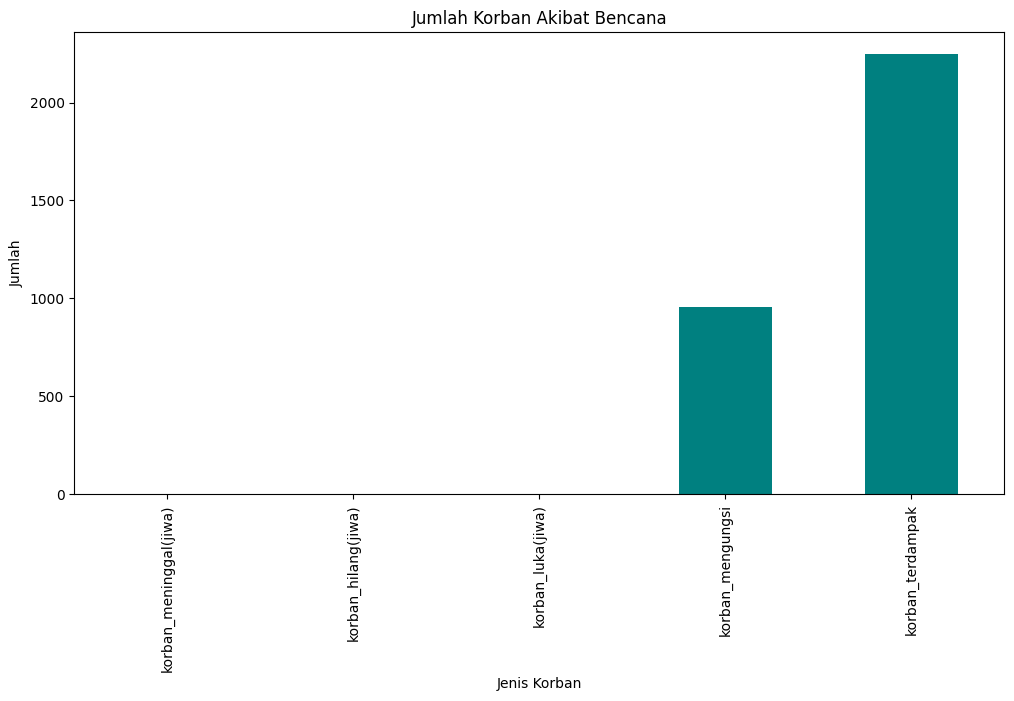

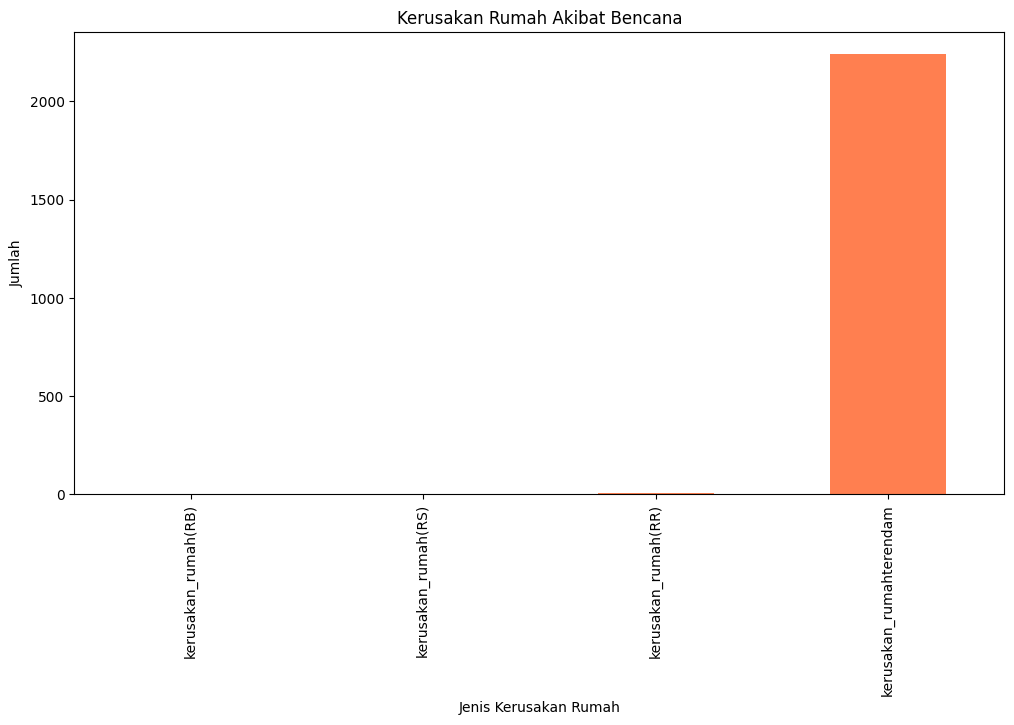

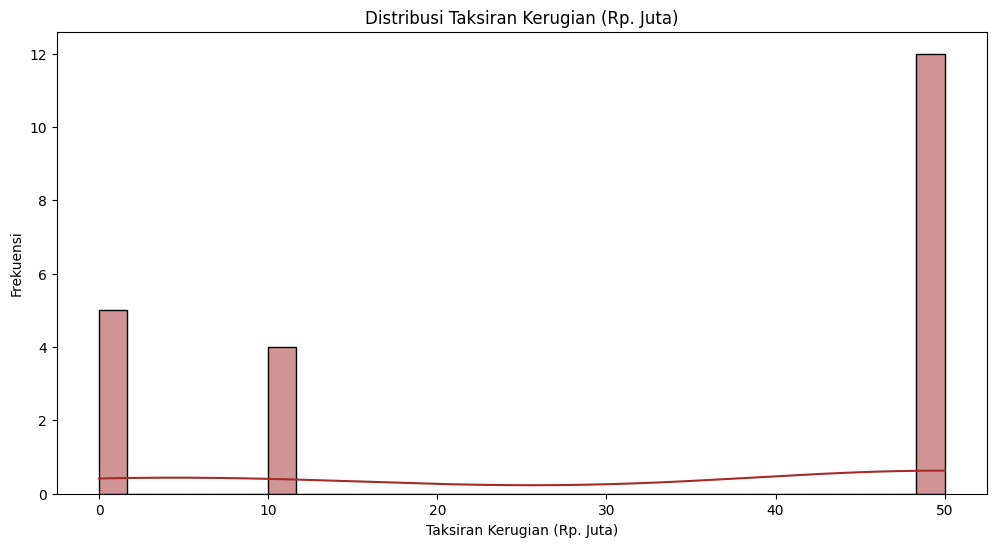

In [18]:
# Visualisasi korban meninggal, hilang, luka, mengungsi, dan terdampak
korban_columns = ['korban_meninggal(jiwa)', 'korban_hilang(jiwa)', 'korban_luka(jiwa)', 'korban_mengungsi', 'korban_terdampak']
data_banjir[korban_columns].sum().plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Jumlah Korban Akibat Bencana')
plt.xlabel('Jenis Korban')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi kerusakan rumah
kerusakan_rumah_columns = ['kerusakan_rumah(RB)', 'kerusakan_rumah(RS)', 'kerusakan_rumah(RR)', 'kerusakan_rumahterendam']
data_banjir[kerusakan_rumah_columns].sum().plot(kind='bar', figsize=(12, 6), color='coral')
plt.title('Kerusakan Rumah Akibat Bencana')
plt.xlabel('Jenis Kerusakan Rumah')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi taksiran kerugian
plt.figure(figsize=(12, 6))
sns.histplot(data_banjir['kerusakan_taksirankerugian(Rp.Juta)'], bins=30, kde=True, color='brown')
plt.title('Distribusi Taksiran Kerugian (Rp. Juta)')
plt.xlabel('Taksiran Kerugian (Rp. Juta)')
plt.ylabel('Frekuensi')
plt.show()


In [19]:
data_banjir.dtypes

tanggal_awal                           datetime64[ns]
tanggal akhir                                  object
bulan                                          object
tahun                                           int64
pukul_awal                                     object
pukul_akhir                                    object
desa/kelurahan                                 object
kecamatan                                      object
kabupaten/kota bengkulu                        object
jumlah kejadian                                 int64
luas_daerah_terdampak                          object
korban_meninggal(jiwa)                          int64
korban_hilang(jiwa)                             int64
korban_luka(jiwa)                               int64
korban_mengungsi                                int64
korban_terdampak                                int64
kerusakan_rumah(RB)                             int64
kerusakan_rumah(RS)                             int64
kerusakan_rumah(RR)         

In [20]:
# Daftar kolom yang perlu dikonversi
kolom_konversi = [
    'tanggal akhir',
    'bulan',
    'pukul_awal',
    'pukul_akhir',
    'desa/kelurahan',
    'kecamatan',
    'kabupaten/kota bengkulu',
    'luas_daerah_terdampak',
    'keterangan',
    'penanganan'
]

# Mengonversi kolom string menjadi float
for kolom in kolom_konversi:
    data_banjir[kolom] = pd.to_numeric(data_banjir[kolom], errors='coerce')

# Memeriksa hasil konversi
print(data_banjir.dtypes)

# Menangani nilai NaN (misalnya, mengisi dengan rata-rata kolom)
for kolom in kolom_konversi:
    data_banjir[kolom].fillna(data_banjir[kolom].mean(), inplace=True)


tanggal_awal                           datetime64[ns]
tanggal akhir                                 float64
bulan                                         float64
tahun                                           int64
pukul_awal                                    float64
pukul_akhir                                   float64
desa/kelurahan                                float64
kecamatan                                     float64
kabupaten/kota bengkulu                       float64
jumlah kejadian                                 int64
luas_daerah_terdampak                         float64
korban_meninggal(jiwa)                          int64
korban_hilang(jiwa)                             int64
korban_luka(jiwa)                               int64
korban_mengungsi                                int64
korban_terdampak                                int64
kerusakan_rumah(RB)                             int64
kerusakan_rumah(RS)                             int64
kerusakan_rumah(RR)         

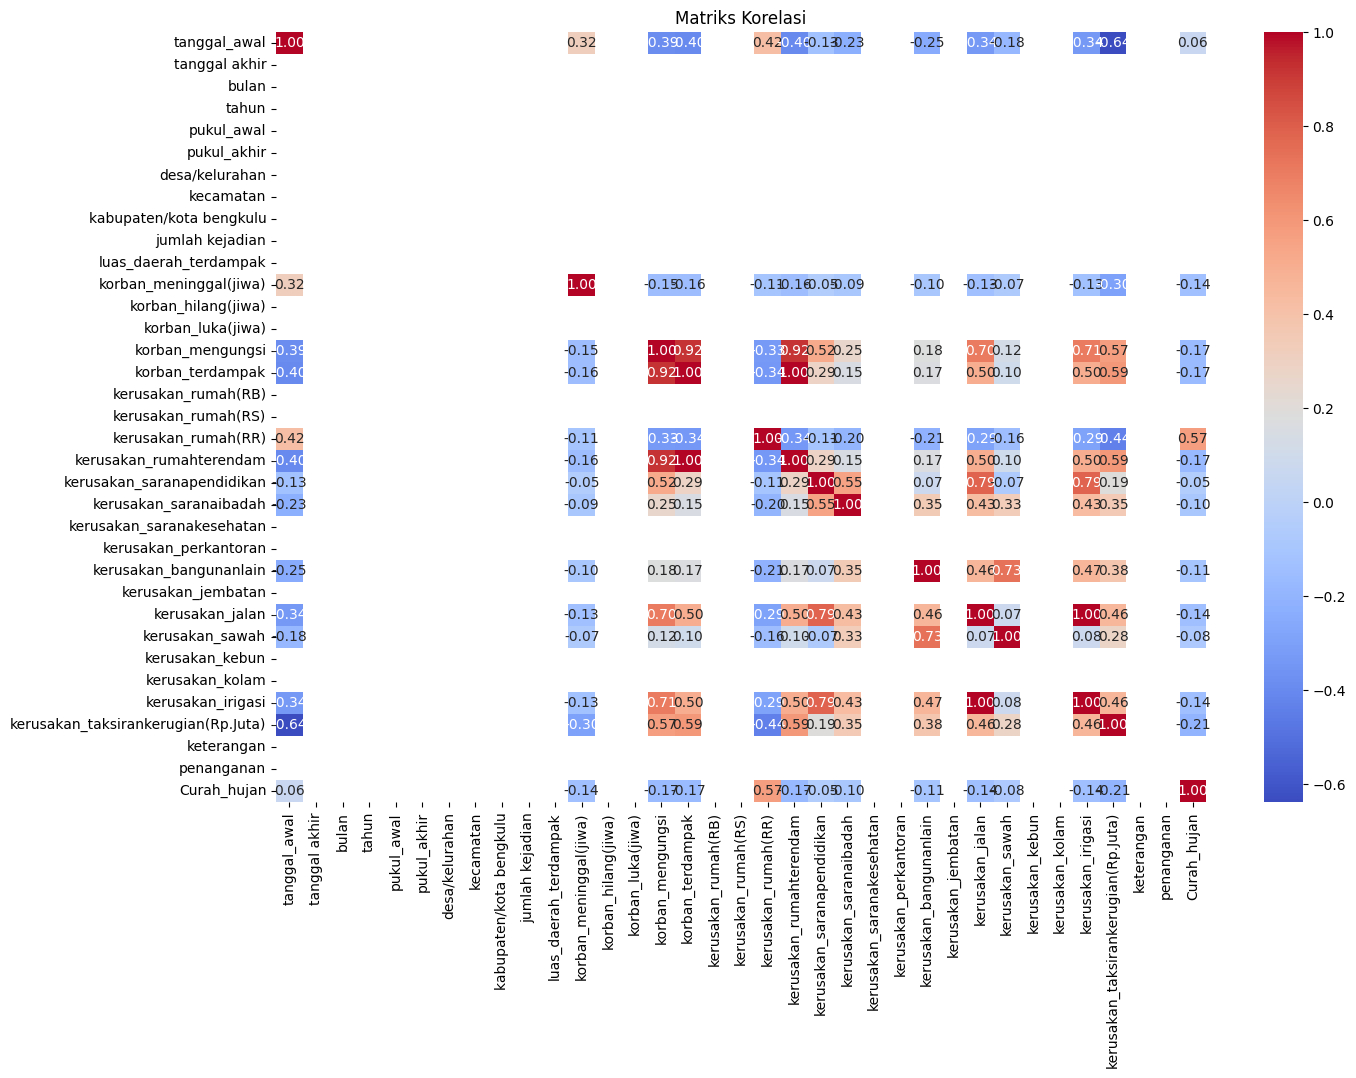

In [21]:
# Menghitung matriks korelasi
correlation_matrix = data_banjir.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()